## Importando os módulos

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from linear_regression import *
from z_score import *

## Preparando os dados

In [72]:
data = pd.read_csv('../artificial1d.csv', header=None)

X = data.iloc[:, :-1].values
y = (data.iloc[:, -1].values).reshape(-1, 1)

### Normalizando

In [73]:
zs = ZScore()
X = zs.fit_transform(X)


In [74]:
X = np.hstack((np.ones((X.shape[0], 1)), X))

## Treinando o modelo

In [75]:
linreg = LinearRegression()
linreg.fit_sgd(X, y)

## Resultados

### MSE

In [76]:
mse = linreg.get_mse(X, y)
print(f'MSE = {mse[0]}')

MSE = 0.2134034410660745


### Parâmetros

In [77]:
w = linreg.get_params()
print(f'Parâmetros = \n{w}')

Parâmetros = 
[[0.06616584]
 [0.9568183 ]]


### Plot da curva

#### Desnormalizando o X

In [78]:
X[:, 1:] = zs.untransform(X[:, 1:])

#### Plot

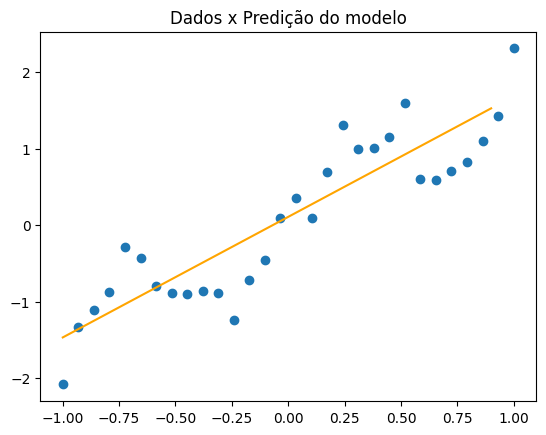

In [79]:
rng = np.arange(min(X[:, 1]), max(X[:, 1]), 0.1)
rng = rng.reshape(-1, 1)

rng_ones = np.hstack((np.ones((rng.shape[0], 1)), rng))

plt.title('Dados x Predição do modelo')
plt.scatter(X[:, 1], y)
plt.plot(rng, zs.transform(linreg.pred(rng_ones)), c='orange')
plt.show()

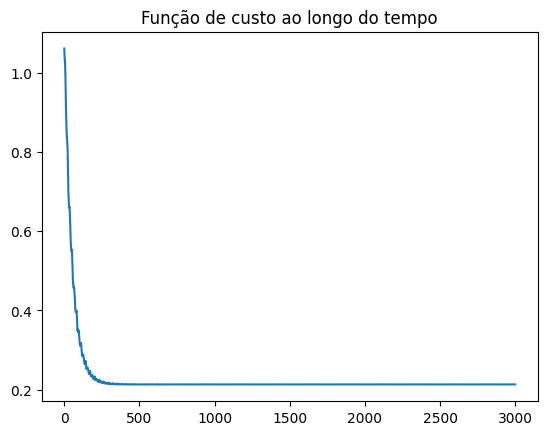

In [80]:
rng = range(len(linreg.get_log()))

plt.title('Função de custo ao longo do tempo')
plt.plot(rng, linreg.get_log())
plt.show()